In [1]:
from epm.experiments.successor_representations.runners.check_sf import prepare_data, eval_params, SIM_FUNCS, get_perfect_sf
import pandas as pd
import numpy as np

In [2]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette('colorblind')

## Cluster size influence on accuracy and similarity to perfect SF 

In [60]:
(
    n_obs_states,
    n_actions,
    transitions,
    state_to_label,
    label_to_obs,
    obs_to_labels,
    true_transition,
    true_emission,
    all_states
) = prepare_data('../logs/1k_ep_10x10_10col_free_pos_agent_experience.pkl')

In [61]:
len(all_states)

49883

In [62]:
datasets = {
    '../logs/1k_ep_10x10_10col_free_pos_s3_agent_experience.pkl': {'gw_size': 100, 'n_colors': 10, 'pos': 'free', 'episodes': 1000},
    '../logs/1k_ep_10x10_10col_free_pos_s2_agent_experience.pkl': {'gw_size': 100, 'n_colors': 10, 'pos': 'free', 'episodes': 1000},
    '../logs/1k_ep_10x10_10col_free_pos_agent_experience.pkl': {'gw_size': 100, 'n_colors': 10, 'pos': 'free', 'episodes': 1000}
}
seeds = [223, 322, 123, 4738, 3980]
results = list()

for dataset_id, path in tqdm(enumerate(datasets)):
    (
        n_obs_states,
        n_actions,
        transitions,
        state_to_label,
        label_to_obs,
        obs_to_labels,
        true_transition,
        true_emission,
        all_states
    ) = prepare_data(path)
    # test different parameters
    # cluster_size = 100
    purity = 1.0
    gamma = 0.8
    steps = 25
    noise = 0
    sim_func_name = 'euc'

    for cluster_size in tqdm([1, 2, 3, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150]):
        for sim_func_name in SIM_FUNCS:
            result = eval_params(
                cluster_size, purity, sim_func_name, steps, gamma, seeds,
                all_states, state_to_label, label_to_obs, obs_to_labels,
                n_obs_states, n_actions, transitions,
                true_transition, true_emission, noise
            )
            result['dataset_id'] = dataset_id
            results.append(result)
data = pd.concat(results, ignore_index=True)

0it [00:00, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

In [63]:
group = data.groupby(by=['cluster_size', 'sim_func', 'seed', 'dataset_id'])

df = group[['acc', 'sim']].agg(['mean'])
df.columns = df.columns.droplevel(1)

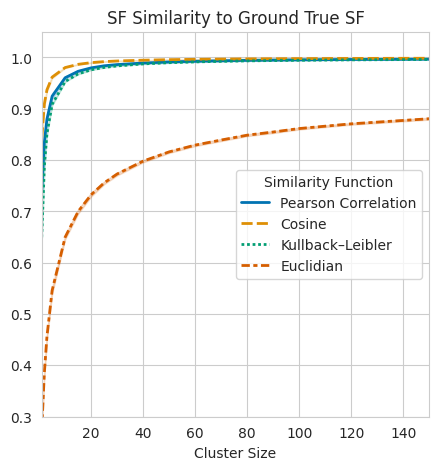

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(df.query('sim_func != "dummy"'), 
             x='cluster_size', y='sim', style='sim_func', hue='sim_func', 
             ax=ax, linewidth=2)
sns.move_legend(ax, "center right")
# ax.set_yscale("log")
ax.set_title('SF Similarity to Ground True SF')
ax.set_ylabel('')
ax.set_xlabel('Cluster Size')
ax.set_xlim(1, 150)
ax.set_ylim(0.3, 1.05)
legend = ax.legend_
legend.set_title('Similarity Function')
for t, l in zip(legend.texts, ['Pearson Correlation', 'Cosine', 'Kullback–Leibler', 'Euclidian']):
    t.set_text(l)
for legobj in legend.legend_handles:
    legobj.set_linewidth(2.0)
fig.savefig('sf_test_sim.pdf', bbox_inches='tight')

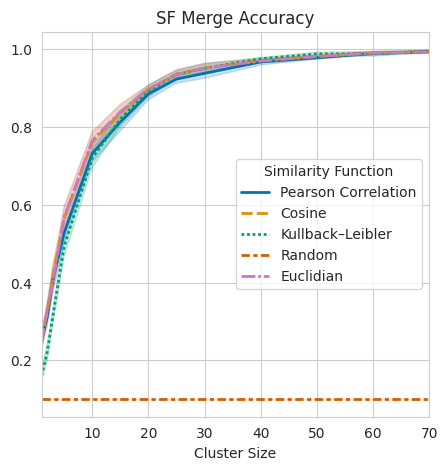

In [65]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(df, 
             x='cluster_size', y='acc', style='sim_func', hue='sim_func', 
             ax=ax, linewidth=2)
sns.move_legend(ax, "center right")
# ax.set_yscale("log")
ax.set_title('SF Merge Accuracy')
ax.set_ylabel('')
ax.set_xlabel('Cluster Size')
ax.set_xlim(1, 70)
# ax.set_ylim(0.3, 1.05)
legend = ax.legend_
legend.set_title('Similarity Function')
for t, l in zip(legend.texts, ['Pearson Correlation', 'Cosine', 'Kullback–Leibler', 'Random', 'Euclidian']):
    t.set_text(l)
for legobj in legend.legend_handles:
    legobj.set_linewidth(2.0)
fig.savefig('sf_test_acc.pdf', bbox_inches='tight')

## Check how similarity and accuracy depends on purity

In [3]:
datasets = {
    '../logs/1k_ep_10x10_10col_free_pos_s3_agent_experience.pkl': {'gw_size': 100, 'n_colors': 10, 'pos': 'free', 'episodes': 1000},
    '../logs/1k_ep_10x10_10col_free_pos_s2_agent_experience.pkl': {'gw_size': 100, 'n_colors': 10, 'pos': 'free', 'episodes': 1000},
    '../logs/1k_ep_10x10_10col_free_pos_agent_experience.pkl': {'gw_size': 100, 'n_colors': 10, 'pos': 'free', 'episodes': 1000}
}
seeds = [223, 322, 123, 4738, 3980]
results = list()

for dataset_id, path in tqdm(enumerate(datasets)):
    (
        n_obs_states,
        n_actions,
        transitions,
        state_to_label,
        label_to_obs,
        obs_to_labels,
        true_transition,
        true_emission,
        all_states
    ) = prepare_data(path)
    # test different parameters
    # cluster_size = 100
    # purity = 1.0
    gamma = 0.8
    steps = 25
    noise = 0
    sim_func_name = 'euc'

    for cluster_size in tqdm([1, 5, 10, 20, 50, 100, 150]):
        for purity in [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4]:
            #for sim_func_name in SIM_FUNCS:
            result = eval_params(
                cluster_size, purity, sim_func_name, steps, gamma, seeds,
                all_states, state_to_label, label_to_obs, obs_to_labels,
                n_obs_states, n_actions, transitions,
                true_transition, true_emission, noise
            )
            result['dataset_id'] = dataset_id
            results.append(result)
data = pd.concat(results, ignore_index=True)

0it [00:00, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
group = data.groupby(by=['cluster_size', 'sim_func', 'purity', 'seed', 'dataset_id'])

df = group[['acc', 'sim']].agg(['mean'])
df.columns = df.columns.droplevel(1)

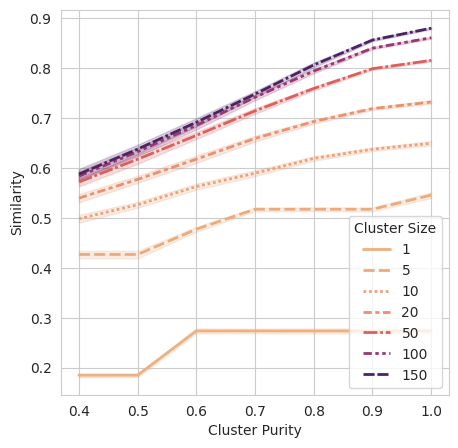

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(df, x='purity', y='sim', style='cluster_size', hue='cluster_size', legend='full', palette='flare', ax=ax, linewidth=2)
sns.move_legend(ax, "lower right")
# ax.set_yscale("log")
# ax.set_title('SF Similarity to Ground True SF')
ax.set_ylabel('Similarity')
ax.set_xlabel('Cluster Purity')
# ax.set_xlim(1, 70)
# ax.set_ylim(0.3, 1.05)
legend = ax.legend_
legend.set_title('Cluster Size')
# for t, l in zip(legend.texts, ['Pearson Correlation', 'Cosine', 'Kullback–Leibler', 'Random', 'Euclidian']):
#     t.set_text(l)
for legobj in legend.legend_handles:
    legobj.set_linewidth(2.0)
fig.savefig('sf_purity_size_sim.pdf', bbox_inches='tight')

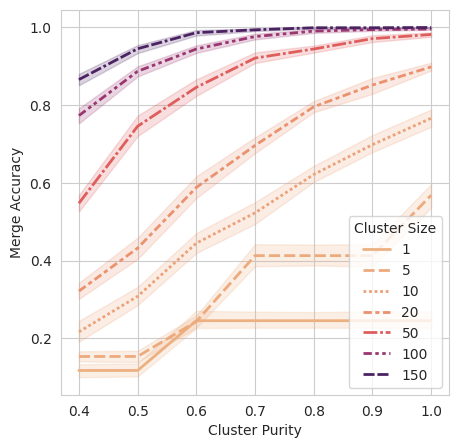

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(df, x='purity', y='acc', style='cluster_size', hue='cluster_size', legend='full', palette='flare', ax=ax, linewidth=2)
sns.move_legend(ax, "lower right")
# ax.set_yscale("log")
# ax.set_title('SF Merge Accuracy')
ax.set_ylabel('Merge Accuracy')
ax.set_xlabel('Cluster Purity')
# ax.set_xlim(1, 70)
# ax.set_ylim(0.3, 1.05)
legend = ax.legend_
legend.set_title('Cluster Size')
# for t, l in zip(legend.texts, ['Pearson Correlation', 'Cosine', 'Kullback–Leibler', 'Random', 'Euclidian']):
#     t.set_text(l)
for legobj in legend.legend_handles:
    legobj.set_linewidth(2.0)
fig.savefig('sf_purity_size_acc.pdf', bbox_inches='tight')

## Check how accuracy depends on label

In [7]:
datasets = {
    '../logs/1k_ep_10x10_10col_free_pos_s3_agent_experience.pkl': {'gw_size': 100, 'n_colors': 10, 'pos': 'free', 'episodes': 1000},
    '../logs/1k_ep_10x10_10col_free_pos_s2_agent_experience.pkl': {'gw_size': 100, 'n_colors': 10, 'pos': 'free', 'episodes': 1000},
    '../logs/1k_ep_10x10_10col_free_pos_agent_experience.pkl': {'gw_size': 100, 'n_colors': 10, 'pos': 'free', 'episodes': 1000}
}
seeds = [223, 322, 123, 4738, 3980]
results = list()
maps = list()

for dataset_id, path in tqdm(enumerate(datasets)):
    (
        n_obs_states,
        n_actions,
        transitions,
        state_to_label,
        label_to_obs,
        obs_to_labels,
        true_transition,
        true_emission,
        all_states
    ) = prepare_data(path)
    maps.append(label_to_obs)
    # test different parameters
    cluster_size = 100
    purity = 1.0
    gamma = 0.8
    steps = 25
    noise = 0
    sim_func_name = 'euc'

    sizes = [1, 5, 10, 20, 50, 100]
    for cluster_size in tqdm(sizes):
        result = eval_params(
            cluster_size, purity, sim_func_name, steps, gamma, seeds,
            all_states, state_to_label, label_to_obs, obs_to_labels,
            n_obs_states, n_actions, transitions,
            true_transition, true_emission, noise
        )
        result['dataset_id'] = dataset_id
        results.append(result)
data = pd.concat(results, ignore_index=True)

0it [00:00, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [8]:
group = data.groupby(by=['dataset_id', 'cluster_size', 'label'])

df = group['acc'].agg('mean')
# df.columns = df.columns.droplevel(1)

In [9]:
df

dataset_id  cluster_size  label
0           1             0        0.2
                          1        0.6
                          2        0.6
                          3        0.2
                          4        0.2
                                  ... 
2           100           95       1.0
                          96       1.0
                          97       1.0
                          98       1.0
                          99       1.0
Name: acc, Length: 1800, dtype: float64

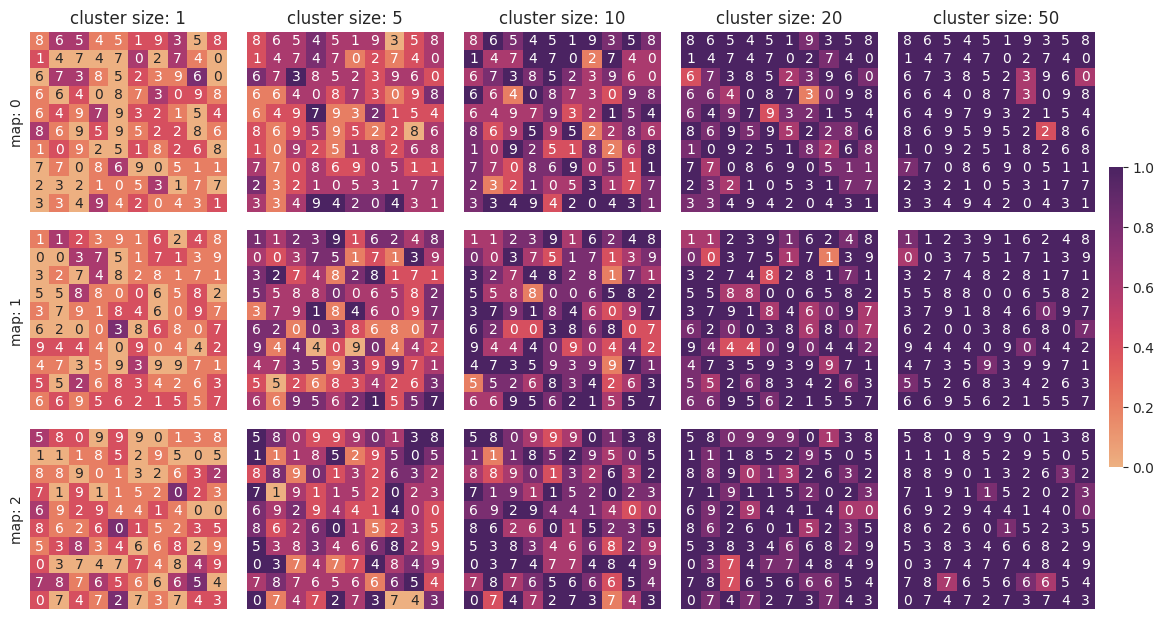

In [10]:
subset_sizes = sizes[:-1]
gw_size = 10
width = 2.5
fig, ax = plt.subplots(
    nrows=3, ncols=len(subset_sizes), 
    figsize=(len(subset_sizes)*width*1.1, 3*width),
)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
cbar_ax = fig.add_axes([.91, .3, .01, .4])
for j in range(3):
    for i, size in enumerate(subset_sizes):
        if i == 0 and j == 0:
            cbar = True
        else:
            cbar = False
        sns.heatmap(
            df.loc[j, size].to_numpy().reshape(gw_size, gw_size), 
            annot=np.array([maps[j][l] for l in range(gw_size*gw_size)]).reshape(gw_size, gw_size),
            vmin = 0,
            vmax = 1.0,
            ax=ax[j][i],
            cbar = cbar,
            cbar_ax = cbar_ax,
            xticklabels=False,
            yticklabels=False,
            cmap='flare'
        )
        if j == 0:
            ax[j][i].set_title(f'cluster size: {size}')
        if i == 0:
            ax[j][i].set_ylabel(f'map: {j}')
# fig.suptitle('Merge Accuracy Per Position')
#fig.tight_layout(pad=1.0)
fig.savefig('sf_acc_maps.pdf', bbox_inches='tight')

Text(0.5, 0.98, 'steps')

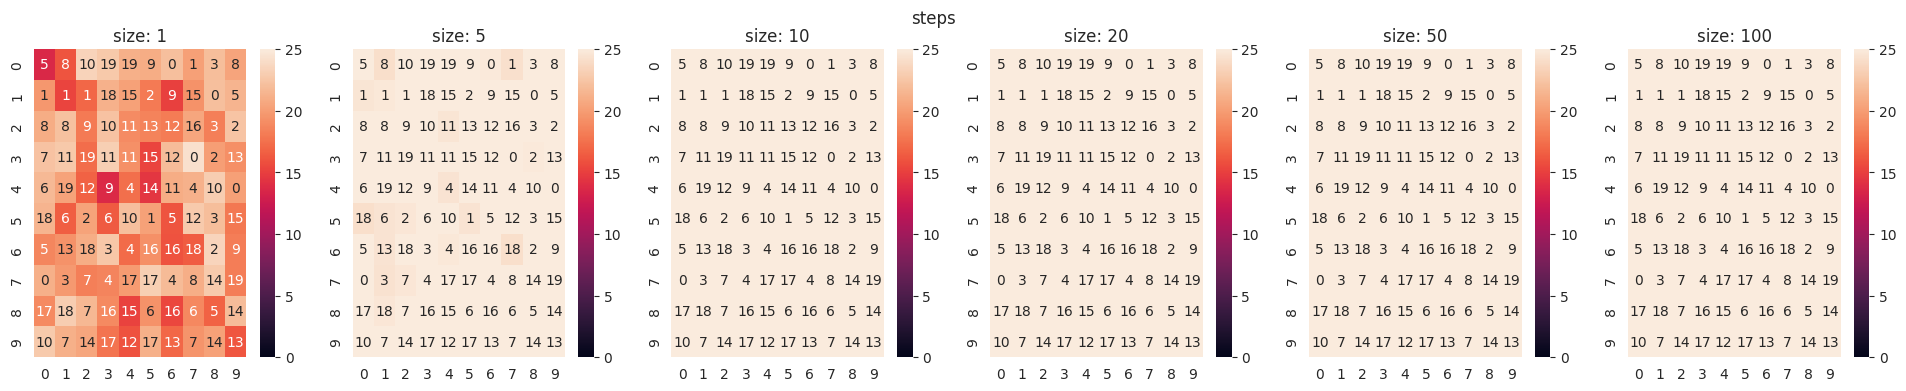

In [61]:
gw_size = 10
group = data.groupby(by=['cluster_size', 'label'])

df = group['gen_steps'].agg('mean')
# df.columns = df.columns.droplevel(1)
width = 4
fig, ax = plt.subplots(nrows=1, ncols=len(sizes), figsize=(len(sizes)*width, width))
for i, size in enumerate(sizes):
    sns.heatmap(
        df.loc[size].to_numpy().reshape(gw_size, gw_size), annot=np.array([label_to_obs[l] for l in range(gw_size*gw_size)]).reshape(gw_size, gw_size),
        vmin = 0,
        vmax = 25,
        ax=ax[i],
        cbar = True
    )
    ax[i].set_title(f'size: {size}')
fig.suptitle('steps')

# Random Splits

In [11]:
from hima.experiments.successor_representations.runners.check_sf import form_clusters, get_cluster_label, prepare_data
import numpy as np
import pandas as pd

In [12]:
(
    n_obs_states,
    n_actions,
    transitions,
    state_to_label,
    label_to_obs,
    obs_to_labels,
    true_transition,
    true_emission,
    all_states
) = prepare_data('../logs/1k_ep_10x10_10col_free_pos_agent_experience.pkl')

In [13]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette('colorblind')

In [14]:
sizes = [5, 10, 20, 30, 40, 50]
n_labels = [2, 3, 5, 10]
n_seeds = 1000 

results = []
for nl in tqdm(n_labels):
    obs_to_labels_sub = {obs: set(list(labels)[:nl]) for obs, labels in obs_to_labels.items()}
    for size in tqdm(sizes):
        for seed in range(n_seeds):
            rng = np.random.default_rng()
            cluster_to_states, label_to_clusters = form_clusters(
                1,
                size,
                None,
                all_states,
                state_to_label,
                label_to_obs,
                obs_to_labels_sub,
                rng
            )
            purities = [get_cluster_label(
                cluster_to_states[c], state_to_label, return_purity=True
            )[-1] for c in cluster_to_states]
            results.append(pd.DataFrame({'purity': purities, 'size': size, 'n_labels': nl}))
data = pd.concat(results, ignore_index=True)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

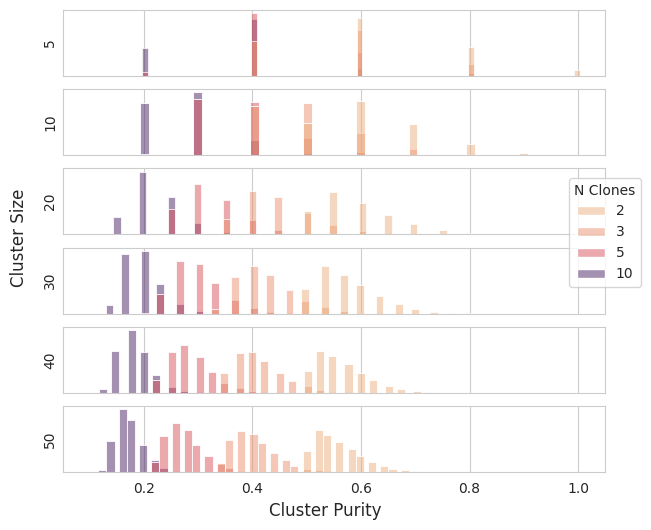

In [15]:
fig, ax = plt.subplots(
    ncols=1, nrows=len(sizes),
    sharex=True,
    figsize=(7, 6),
)
# plt.subplots_adjust(hspace=0.1)
for i, size in enumerate(sizes):
    df = data.query(f'size == {size}')
    sns.histplot(df, x='purity', hue='n_labels', ax=ax[i], stat='probability', shrink=2, palette='flare', legend=i==3)
    ax[i].set_ylabel(f'{size}')
    # ax[i].set_ylim(0, 1.0)
    ax[i].set_yticks([])
    ax[i].set_xlabel('')
sns.move_legend(
    ax[3], "lower center",
    bbox_to_anchor=(1, 0.3), ncol=1, title='N Clones', frameon=True,
)
fig.supylabel('Cluster Size', x=0.05)
fig.supxlabel('Cluster Purity', y=0.03)
# fig.suptitle('Random Splits Cluster Purity Distribution', y=0.92)
fig.savefig('cluster_purity_random.pdf', bbox_inches='tight')

# Main Experiments

In [16]:
from aim import Repo

In [17]:
merge_results = Repo('../')

In [18]:
metric_names = [
    'layer/second_level_acc',
    'layer/second_level_none',
    'merge/acc',
    'episodes',
    'clusters/purity_weighted',
    'agent/num_clusters',
    'merge/delta_num_clusters'
    'layer/first_order_acc',
    'merge_step'
]

In [19]:
query = '(run.hparams.agent.agent.min_cluster_size in {100, 1, 10}) and ((metric.name == "layer/second_level_acc") or (metric.name == "layer/second_level_none") or (metric.name == "merge/acc") or (metric.name == "merge_step") or (metric.name == "episodes") or (metric.name == "clusters/purity_weighted") or (metric.name == "agent/num_clusters") or (metric.name == "merge/delta_num_clusters") or (metric.name == "layer/first_order_acc"))'

In [20]:
metrics = merge_results.query_metrics(query)

In [21]:
data = metrics.dataframe(include_props=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:13<00:00,  5.61it/s]


In [22]:
data

,idx,step,value,epoch,time,run.hash,run.__system_params.arguments,run.__system_params.env_variables.ANIMALAI_EXE,run.__system_params.env_variables.ANIMALAI_ROOT,run.__system_params.env_variables.CADENCE_AUTO_STARTED,...,run.hparams.run.action_inertia,run.hparams.run.frame_skip,run.hparams.run.observe_actions,run.hparams.run.reward_free,run.hparams.run.scenario,run.hparams.run.seed,run.hparams.run.setup,run.hparams.run.strategies,metric.name,metric.context
0,0,2,1.0,NaN,2025-08-01 22:58:56.053356,8bbd02aec6fb4752a7e28951,"[""/home/evgenio/Activity/HTM/htm_rl_tepo/hima_...",/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,true,...,1,0,True,True,configs/scenario/gridworld_pomdp_ec_gen.yaml,33281,free_10x10_no_landmarks,None,agent/num_clusters,<ObjectFlag>
1,1,6,1.0,NaN,2025-08-01 22:58:57.912749,8bbd02aec6fb4752a7e28951,"[""/home/evgenio/Activity/HTM/htm_rl_tepo/hima_...",/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,true,...,1,0,True,True,configs/scenario/gridworld_pomdp_ec_gen.yaml,33281,free_10x10_no_landmarks,None,agent/num_clusters,<ObjectFlag>
2,2,9,52.0,NaN,2025-08-01 22:58:57.967118,8bbd02aec6fb4752a7e28951,"[""/home/evgenio/Activity/HTM/htm_rl_tepo/hima_...",/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,true,...,1,0,True,True,configs/scenario/gridworld_pomdp_ec_gen.yaml,33281,free_10x10_no_landmarks,None,agent/num_clusters,<ObjectFlag>
3,3,12,52.0,NaN,2025-08-01 22:58:58.009059,8bbd02aec6fb4752a7e28951,"[""/home/evgenio/Activity/HTM/htm_rl_tepo/hima_...",/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,true,...,1,0,True,True,configs/scenario/gridworld_pomdp_ec_gen.yaml,33281,free_10x10_no_landmarks,None,agent/num_clusters,<ObjectFlag>
4,4,15,52.0,NaN,2025-08-01 22:58:58.049461,8bbd02aec6fb4752a7e28951,"[""/home/evgenio/Activity/HTM/htm_rl_tepo/hima_...",/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,true,...,1,0,True,True,configs/scenario/gridworld_pomdp_ec_gen.yaml,33281,free_10x10_no_landmarks,None,agent/num_clusters,<ObjectFlag>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,498,498,498.0,NaN,2025-08-01 21:43:59.774356,afe95123576644d0a8efe2ad,"[""/home/evgenio/Activity/HTM/htm_rl_tepo/hima_...",/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,true,...,1,0,True,True,configs/scenario/gridworld_pomdp_ec_gen.yaml,33281,free_10x10_no_landmarks,None,merge_step,<ObjectFlag>
499,499,499,499.0,NaN,2025-08-01 21:43:59.955235,afe95123576644d0a8efe2ad,"[""/home/evgenio/Activity/HTM/htm_rl_tepo/hima_...",/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,true,...,1,0,True,True,configs/scenario/gridworld_pomdp_ec_gen.yaml,33281,free_10x10_no_landmarks,None,merge_step,<ObjectFlag>
500,500,500,500.0,NaN,2025-08-01 21:44:00.072475,afe95123576644d0a8efe2ad,"[""/home/evgenio/Activity/HTM/htm_rl_tepo/hima_...",/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,true,...,1,0,True,True,configs/scenario/gridworld_pomdp_ec_gen.yaml,33281,free_10x10_no_landmarks,None,merge_step,<ObjectFlag>
501,501,501,501.0,NaN,2025-08-01 21:44:00.481250,afe95123576644d0a8efe2ad,"[""/home/evgenio/Activity/HTM/htm_rl_tepo/hima_...",/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,/home/evgenio/Desktop/Activity/HTM/htm_rl_tepo...,true,...,1,0,True,True,configs/scenario/gridworld_pomdp_ec_gen.yaml,33281,free_10x10_no_landmarks,None,merge_step,<ObjectFlag>


In [23]:
def prepare_metric(metric_name):
    m = data.query(f"`metric.name` == '{metric_name}'")[['run.hparams.agent.agent', 'value', 'run.hash', 'step']]
    m['min_cluster_size'] = m['run.hparams.agent.agent'].apply(lambda x: eval(x.replace('true', 'True').replace('false', 'False'))['min_cluster_size'])
    m['merge_mode'] = m['run.hparams.agent.agent'].apply(lambda x: eval(x.replace('true', 'True').replace('false', 'False'))['merge_mode'])
    m['merge_iterations'] = m['run.hparams.agent.agent'].apply(lambda x: eval(x.replace('true', 'True').replace('false', 'False'))['merge_iterations'])
    m = m.drop(columns='run.hparams.agent.agent')
    return m

In [24]:
def plot_line(data, keys, metric, label, color, style, smoothing):
    mean = data.loc[keys, (metric, 'mean')]
    std = data.loc[keys, (metric, 'std')]
    low = mean - 0.5 * std
    high = mean + 0.5 * std
    x = np.arange(mean.size)
    plt.fill_between(x, low, high, color=(color[0], color[1], color[2], 0.1))
    plt.plot(x, mean, color=(color[0], color[1], color[2], 1.0), label=label, linestyle=style)

In [25]:
acc = prepare_metric('layer/second_level_acc')

In [26]:
first_acc = prepare_metric('layer/first_order_acc')

In [29]:
from scipy.ndimage import gaussian_filter1d

In [30]:
def smooth_runs(metric, sigma, min_steps):
    runs = metric['run.hash'].unique()
    results = list()
    for run in runs:
        run_data = metric.query(f"`run.hash`=='{run}'").copy()
        if len(run_data) < min_steps:
            print(f'skipped: {run}')
            continue
        run_data['value_sm'] = gaussian_filter1d(run_data['value'].to_numpy(), sigma=sigma, mode='nearest')
        results.append(run_data)
    sm = pd.concat(results)
    return sm

In [31]:
sm_acc = smooth_runs(acc, 20, 1000)

skipped: 5d6091fe867041e3bfabf4c2


In [32]:
group_acc = sm_acc.groupby(by=['step', 'min_cluster_size', 'merge_mode', 'merge_iterations']).agg(['mean', 'std'])

/tmp/ipykernel_64358/1407780250.py:1: FutureWarning: ['run.hash'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  group_acc = sm_acc.groupby(by=['step', 'min_cluster_size', 'merge_mode', 'merge_iterations']).agg(['mean', 'std'])


In [33]:
group_acc

value            \
                                                       mean       std   
step min_cluster_size merge_mode merge_iterations                       
0    1                random_sf  0                 0.000000  0.000000   
                                 5                 0.000000  0.000000   
                      sf         5                 0.000000  0.000000   
     10               random_sf  0                 0.000000  0.000000   
                                 5                 0.000000  0.000000   
...                                                     ...       ...   
3024 10               random_sf  5                 0.713725  0.146469   
                      sf         5                 0.815686  0.105227   
     100              random_sf  0                 0.545098  0.128128   
                                 5                 0.666667  0.110049   
                      sf         5                 0.611765  0.292611   

                                                   value_sm            
                                                       mean       std  
step min_cluster_size merge_mode merge_iterations                      
0    1                random_sf  0                 0.047683  0.005996  
                                 5                 0.052816  0.011520  
                      sf         5                 0.050858  0.005053  
     10               random_sf  0                 0.081719  0.016391  
                                 5                 0.093677  0.021650  
...                                                     ...       ...  
3024 10               random_sf  5                 0.669067  0.084516  
                      sf         5                 0.784579  0.059721  
     100              random_sf  0                 0.531504  0.068152  
                                 5                 0.648155  0.061333  
                      sf         5                 0.661502  0.141184  

[9018 rows x 4 columns]

In [34]:
sm_first_acc = smooth_runs(first_acc, 20, 1000)

skipped: 5d6091fe867041e3bfabf4c2


In [35]:
group_first_acc = sm_first_acc.groupby(by=['step']).agg(['mean', 'std'])

/tmp/ipykernel_64358/2457573517.py:1: FutureWarning: ['run.hash', 'merge_mode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  group_first_acc = sm_first_acc.groupby(by=['step']).agg(['mean', 'std'])


In [36]:
group_first_acc

value           min_cluster_size            merge_iterations  \
          mean       std             mean        std             mean   
step                                                                    
0     0.000000  0.000000        37.818182  45.388387         3.295455   
4     0.319091  0.095767        37.818182  45.388387         3.295455   
7     0.438948  0.153592        37.818182  45.388387         3.295455   
10    0.426916  0.083496        37.818182  45.388387         3.295455   
13    0.393494  0.053053        37.818182  45.388387         3.295455   
...        ...       ...              ...        ...              ...   
3011  0.423797  0.167140        37.818182  45.388387         3.295455   
3014  0.591800  0.224572        37.818182  45.388387         3.295455   
3017  0.579323  0.128296        37.818182  45.388387         3.295455   
3020  0.568627  0.225872        37.818182  45.388387         3.295455   
3024  0.549465  0.106853        37.818182  45.388387         3.295455   

                value_sm            
           std      mean       std  
step                                
0     2.397475  0.236668  0.004331  
4     2.397475  0.246478  0.004518  
7     2.397475  0.256283  0.004719  
10    2.397475  0.266056  0.004939  
13    2.397475  0.275773  0.005177  
...        ...       ...       ...  
3011  2.397475  0.525299  0.047977  
3014  2.397475  0.526027  0.050244  
3017  2.397475  0.526777  0.052516  
3020  2.397475  0.527545  0.054786  
3024  2.397475  0.528330  0.057047  

[1002 rows x 8 columns]

In [37]:
colors = {
    1: (51/255, 34/255, 136/255),
    10: (136/255, 34/255, 85/255),
    #100: (204/255, 102/255, 119/255),
    # 100: (136/255, 204/255, 238/255),
    100: (221/255, 204/255, 119/255)
}

In [38]:
from scipy.ndimage import gaussian_filter1d
plt.rcParams.update({'font.size': 12})

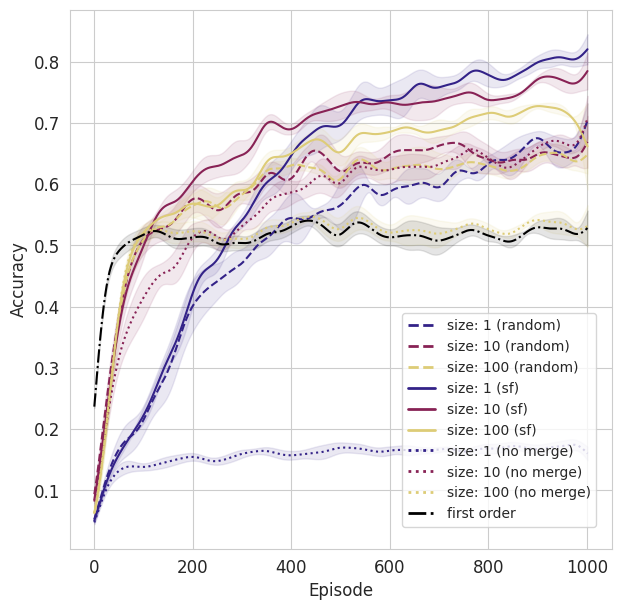

In [39]:
sigma = 10

plt.figure(figsize=(7, 7))

plot_line(group_acc, (slice(None), 1, 'random_sf', 5), 'value_sm', 'size: 1 (random)', colors[1], '--', sigma)
plot_line(group_acc, (slice(None), 10, 'random_sf', 5), 'value_sm', 'size: 10 (random)', colors[10], '--', sigma)
plot_line(group_acc, (slice(None), 100, 'random_sf', 5), 'value_sm', 'size: 100 (random)', colors[100], '--', sigma)

plot_line(group_acc, (slice(None), 1, 'sf', 5), 'value_sm', 'size: 1 (sf)', colors[1], '-', sigma)
plot_line(group_acc, (slice(None), 10, 'sf', 5), 'value_sm', 'size: 10 (sf)', colors[10], '-', sigma)
plot_line(group_acc, (slice(None), 100, 'sf', 5), 'value_sm', 'size: 100 (sf)', colors[100], '-', sigma)

plot_line(group_acc, (slice(None), 1, 'random_sf', 0), 'value_sm', 'size: 1 (no merge)', colors[1], ':', sigma)
plot_line(group_acc, (slice(None), 10, 'random_sf', 0), 'value_sm', 'size: 10 (no merge)', colors[10], ':', sigma)
plot_line(group_acc, (slice(None), 100, 'random_sf', 0), 'value_sm', 'size: 100 (no merge)', colors[100], ':', sigma)

plot_line(group_first_acc, slice(None), 'value_sm', 'first order', (0, 0, 0), '-.', sigma)

# plt.title("Gridworld Prediction Accuracy")
plt.xlabel('Episode')
plt.ylabel('Accuracy')
leg = plt.legend(ncols=1, fontsize='small', markerscale=5, bbox_to_anchor=(0.6, 0.45))
for legobj in leg.legend_handles:
    legobj.set_linewidth(2.0)
plt.grid(True)
plt.savefig('gw_acc.pdf', bbox_inches='tight')

In [40]:
purity = prepare_metric('clusters/purity_weighted')

In [41]:
agg_purity = purity.groupby(by=['step', 'min_cluster_size', 'merge_mode', 'merge_iterations']).agg(['mean', 'std'])

/tmp/ipykernel_64358/418024306.py:1: FutureWarning: ['run.hash'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_purity = purity.groupby(by=['step', 'min_cluster_size', 'merge_mode', 'merge_iterations']).agg(['mean', 'std'])


In [42]:
agg_purity

value          
                                                       mean       std
step min_cluster_size merge_mode merge_iterations                    
3    1                random_sf  0                 0.000000  0.000000
                                 5                 0.000000  0.000000
                      sf         5                 0.000000  0.000000
     10               random_sf  0                 0.000000  0.000000
                                 5                 0.000000  0.000000
...                                                     ...       ...
3023 10               random_sf  5                 0.530852  0.020408
                      sf         5                 0.628077  0.034908
     100              random_sf  0                 0.360702  0.019713
                                 5                 0.534182  0.005470
                      sf         5                 0.580645  0.031145

[189 rows x 2 columns]

In [43]:
colors = {
    1: (51/255, 34/255, 136/255),
    10: (136/255, 34/255, 85/255),
    #100: (204/255, 102/255, 119/255),
    # 100: (136/255, 204/255, 238/255),
    100: (221/255, 204/255, 119/255)
}

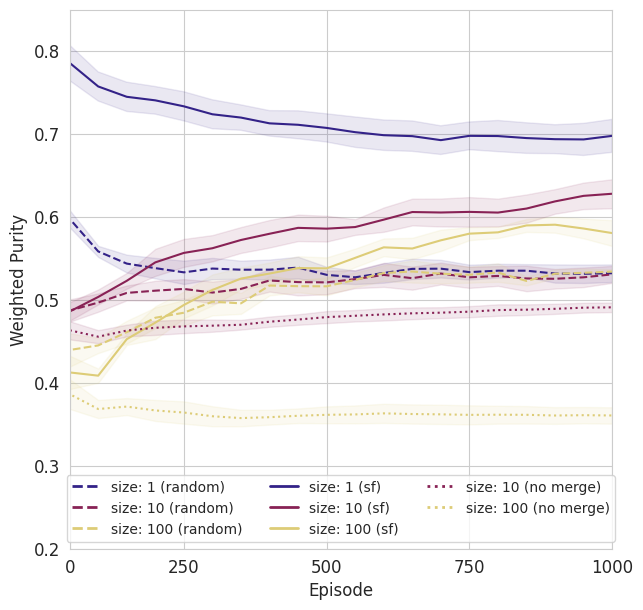

In [44]:
plt.figure(figsize=(7, 7))

plot_line(agg_purity, (slice(None), 1, 'random_sf', 5), 'value', 'size: 1 (random)', colors[1], '--', sigma)
plot_line(agg_purity, (slice(None), 10, 'random_sf', 5), 'value', 'size: 10 (random)', colors[10], '--', sigma)
plot_line(agg_purity, (slice(None), 100, 'random_sf', 5), 'value', 'size: 100 (random)', colors[100], '--', sigma)

plot_line(agg_purity, (slice(None), 1, 'sf', 5), 'value', 'size: 1 (sf)', colors[1], '-', sigma)
plot_line(agg_purity, (slice(None), 10, 'sf', 5), 'value', 'size: 10 (sf)', colors[10], '-', sigma)
plot_line(agg_purity, (slice(None), 100, 'sf', 5), 'value', 'size: 100 (sf)', colors[100], '-', sigma)

#plot_line(agg_purity, (slice(None), 1, 'random_sf', 0), 'value', 'size: 1 (no merge)', colors[1], ':', sigma)
plot_line(agg_purity, (slice(None), 10, 'random_sf', 0), 'value', 'size: 10 (no merge)', colors[10], ':', sigma)
plot_line(agg_purity, (slice(None), 100, 'random_sf', 0), 'value', 'size: 100 (no merge)', colors[100], ':', sigma)

# plt.title("Gridworld Cluster Purity")
plt.xlabel('Episode')
plt.ylabel('Weighted Purity')
plt.xlim(1, 20)
plt.ylim(0.2, 0.85)
plt.xticks(ticks=[1, 5, 10, 15, 20], labels=[0, 250, 500, 750, 1000])
leg = plt.legend(ncols=3, fontsize='small', markerscale=5, loc='lower center')
for legobj in leg.legend_handles:
    legobj.set_linewidth(2.0)
plt.grid(True)
plt.savefig('gw_purity.pdf', bbox_inches='tight')

In [45]:
n_clusters = prepare_metric('agent/num_clusters')

In [46]:
n_clusters_sm = smooth_runs(n_clusters, 20, 1000)

skipped: 5d6091fe867041e3bfabf4c2


In [47]:
group_n_clusters = n_clusters_sm.groupby(by=['step', 'min_cluster_size', 'merge_mode', 'merge_iterations']).agg(['mean', 'std'])

/tmp/ipykernel_64358/821435234.py:1: FutureWarning: ['run.hash'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  group_n_clusters = n_clusters_sm.groupby(by=['step', 'min_cluster_size', 'merge_mode', 'merge_iterations']).agg(['mean', 'std'])


In [48]:
group_n_clusters

value             \
                                                    mean        std   
step min_cluster_size merge_mode merge_iterations                     
2    1                random_sf  0                   1.0   0.000000   
                                 5                   1.0   0.000000   
                      sf         5                   1.0   0.000000   
     10               random_sf  0                   1.0   0.000000   
                                 5                   1.0   0.000000   
...                                                  ...        ...   
3026 10               random_sf  5                 375.8  16.634302   
                      sf         5                 551.8  25.772078   
     100              random_sf  0                 338.4   3.435113   
                                 5                 101.2   3.633180   
                      sf         5                 154.8   5.357238   

                                                     value_sm             
                                                         mean        std  
step min_cluster_size merge_mode merge_iterations                         
2    1                random_sf  0                 274.570155   0.575743  
                                 5                 188.105281   5.058033  
                      sf         5                 233.784320  10.904090  
     10               random_sf  0                  25.216854   0.270314  
                                 5                  23.996117   0.661378  
...                                                       ...        ...  
3026 10               random_sf  5                 376.549975  18.090869  
                      sf         5                 551.872313  26.150442  
     100              random_sf  0                 336.446092   3.530991  
                                 5                 101.178429   3.845397  
                      sf         5                 154.483898   5.316622  

[9018 rows x 4 columns]

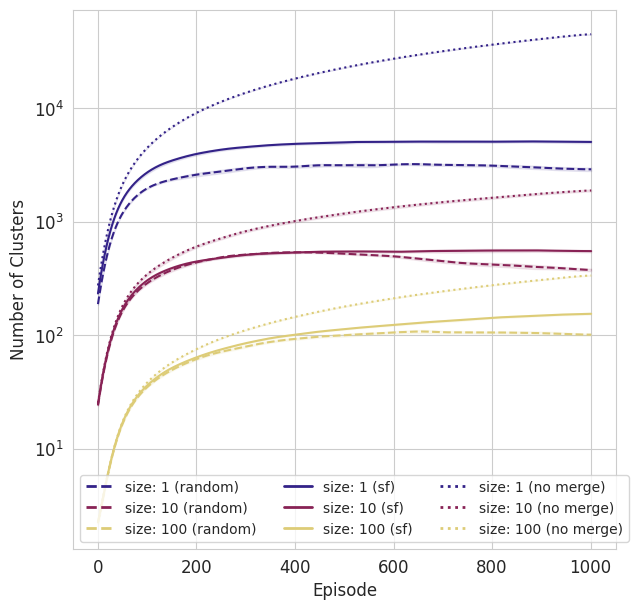

In [50]:
plt.figure(figsize=(7, 7))

plot_line(group_n_clusters, (slice(None), 1, 'random_sf', 5), 'value_sm', 'size: 1 (random)', colors[1], '--', sigma)
plot_line(group_n_clusters, (slice(None), 10, 'random_sf', 5), 'value_sm', 'size: 10 (random)', colors[10], '--', sigma)
plot_line(group_n_clusters, (slice(None), 100, 'random_sf', 5), 'value_sm', 'size: 100 (random)', colors[100], '--', sigma)

plot_line(group_n_clusters, (slice(None), 1, 'sf', 5), 'value_sm', 'size: 1 (sf)', colors[1], '-', sigma)
plot_line(group_n_clusters, (slice(None), 10, 'sf', 5), 'value_sm', 'size: 10 (sf)', colors[10], '-', sigma)
plot_line(group_n_clusters, (slice(None), 100, 'sf', 5), 'value_sm', 'size: 100 (sf)', colors[100], '-', sigma)

plot_line(group_n_clusters, (slice(None), 1, 'random_sf', 0), 'value_sm', 'size: 1 (no merge)', colors[1], ':', sigma)
plot_line(group_n_clusters, (slice(None), 10, 'random_sf', 0), 'value_sm', 'size: 10 (no merge)', colors[10], ':', sigma)
plot_line(group_n_clusters, (slice(None), 100, 'random_sf', 0), 'value_sm', 'size: 100 (no merge)', colors[100], ':', sigma)

# plot_line(group_first_acc, slice(None), 'value_sm', 'first order', (0, 0, 0), '-.', sigma)

# plt.title("Gridworld Number of Clusters")
plt.xlabel('Episode')
plt.ylabel('Number of Clusters')
plt.yscale('log')
leg = plt.legend(ncols=3, fontsize='small', markerscale=5)
for legobj in leg.legend_handles:
    legobj.set_linewidth(2.0)
plt.grid(True)
plt.savefig('gw_n_clusters.pdf', bbox_inches='tight')

# Structure

In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def sparse_to_dense(sparse, gT):
    T = np.zeros_like(gT)
    for a, d_a in enumerate(sparse):
        for c in d_a:
            outs = d_a[c]
            for next_c, p in outs.items():
                T[a][c][next_c] = p
    return T

In [6]:
transitions = list()
for i, path in enumerate(['../logs/10cs_random_agent_experience.pkl', '../logs/10cs_random_s2_agent_experience.pkl', '../logs/10cs_random_s3_agent_experience.pkl']):
    with open(path, 'rb') as file:
        experience = pickle.load(file)
    T = sparse_to_dense(experience['third_level'], experience['true_transition'])
    transitions.append(T)
transitions_random = np.concatenate(transitions, axis=0).mean(axis=0)

In [7]:
transitions = list()
for i, path in enumerate(['../logs/10cs_no_merge_agent_experience.pkl', '../logs/10cs_no_merge_s2_agent_experience.pkl', '../logs/10cs_no_merge_s3_agent_experience.pkl']):
    with open(path, 'rb') as file:
        experience = pickle.load(file)
    T = sparse_to_dense(experience['third_level'], experience['true_transition'])
    transitions.append(T)
transitions_no_merge = np.concatenate(transitions, axis=0).mean(axis=0)

In [8]:
transitions = list()
for i, path in enumerate(['../logs/10cs_sf_agent_experience.pkl', '../logs/10cs_sf_s2_agent_experience.pkl', '../logs/10cs_sf_s3_agent_experience.pkl']):
    with open(path, 'rb') as file:
        experience = pickle.load(file)
    T = sparse_to_dense(experience['third_level'], experience['true_transition'])
    transitions.append(T)
transitions_sf = np.concatenate(transitions, axis=0).mean(axis=0)

In [9]:
ground_true = experience['true_transition']

In [17]:
plt.rcParams.update({'font.size': 14})

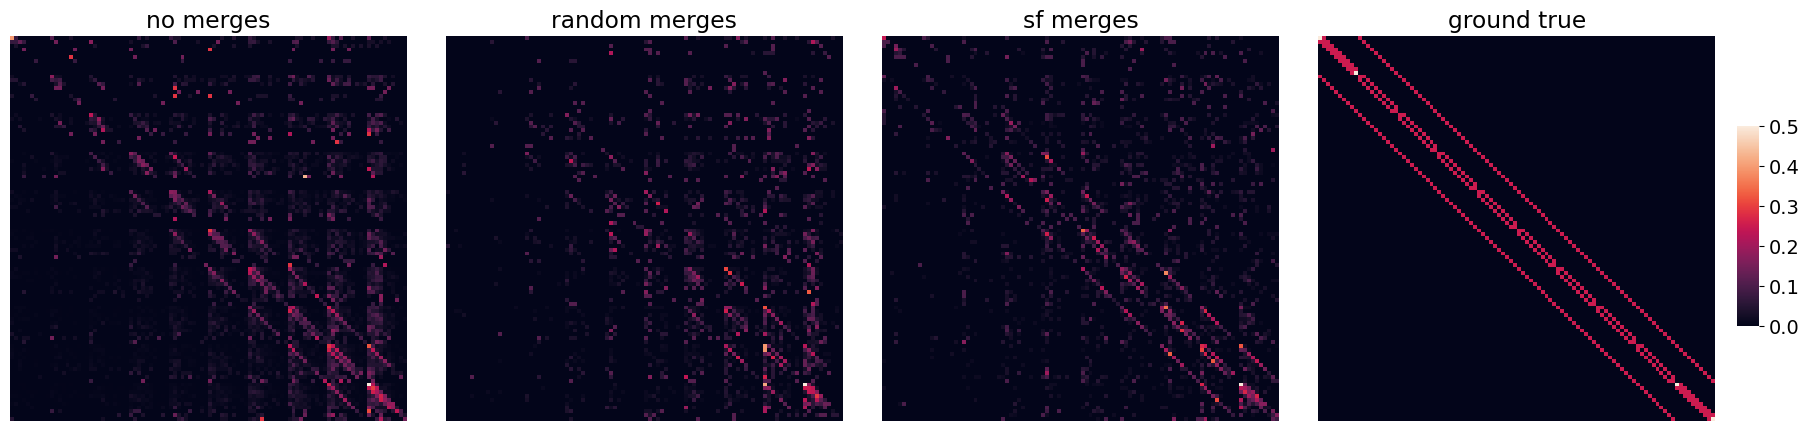

In [19]:
labels = ['no merges', 'random merges', 'sf merges']
width=5
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(4*width*1.1, width))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
cbar_ax = fig.add_axes([.91, .3, .01, .4])
for i, trans in enumerate([transitions_no_merge, transitions_random, transitions_sf]): 
    sns.heatmap(trans, ax=axs[i], cbar=False, yticklabels=False, xticklabels=False, linecolor='black')
    axs[i].set_title(f'{labels[i]}')

sns.heatmap(ground_true.mean(axis=0), ax=axs[-1], yticklabels=False, xticklabels=False, cbar=True, cbar_ax=cbar_ax)
axs[-1].set_title(f'ground true')
fig.savefig('sf_structure.png', bbox_inches='tight', dpi=500)